In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline 

In [ ]:
! python -m spacy download en_core_web_sm

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [ ]:
import pandas
Elon_musk = pd.read_csv('Elon_musk.csv',error_bad_lines=False, sep=",", encoding='cp1252')
Elon_musk

,Unnamed: 0,Text
0,1,@kunalb11 I’m an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [ ]:
Elon_musk = [Text.strip() for Text in Elon_musk.Text]
Elon_musk = [Text for Text in Elon_musk if Text]
Elon_musk[0:10]

['@kunalb11 I’m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [ ]:
# joining the list into one sting /text 
text = ' '.join(Elon_musk)
text

'@kunalb11 I’m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It’s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U+0001F

In [ ]:
# remove punctuation 
no_punc_text = text.translate(str.maketrans(' ',' ',string.punctuation))
no_punc_text

'kunalb11 I’m an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it joerogan Spotify Great interview gtera27 Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox httpstco9WFKMYu2oj Frodo was the underdoge\nAll thought he would fail\nHimself most of all httpstcozGxJFDzzrM OwenSparks flcnhvy anonyx10 Haha thanks  flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely GiveDirectly Just sent some Just agree to do Clubhouse with kanyewest httpstco3rWE9uHSTS geoffkeighley UnrealEngine It’s getting real Bought some Dogecoin for lil X so he can be a toddler hodler JoshManMode He definitely has issues but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U0001F923U0001F923 This is true power haha httpstcoFc9uhQSd7O freewalletorg

In [56]:
# Tokenization 
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(no_punc_text)
print(text_tokens[0:50])

['kunalb11', 'I', '’', 'm', 'an', 'alien', 'IDAACarmack', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'nextlevel', 'Have', 'you', 'tried', 'it', 'joerogan', 'Spotify', 'Great', 'interview', 'gtera27', 'Doge', 'is', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'Happy', 'New', 'Year', 'of', 'the', 'Ox']


In [57]:
len(text_tokens)

21785

In [58]:
# Remove stopwords 
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
my_stop_words = stopwords.words('english')
my_stop_words.append('the')
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:40])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['kunalb11', 'I', '’', 'alien', 'IDAACarmack', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', 'joerogan', 'Spotify', 'Great', 'interview', 'gtera27', 'Doge', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'httpstco9WFKMYu2oj', 'Frodo', 'underdoge', 'All', 'thought', 'would']


In [59]:
# normalize the data 
lower_words = [Text.lower() for Text in no_stop_tokens ]
print(lower_words[0:25])

['kunalb11', 'i', '’', 'alien', 'idaacarmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tried', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'doge', 'underestimated', 'teslacn', 'congratulations', 'tesla', 'china', 'amazing', 'execution']


In [60]:
# stemming (root words )
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:40])

['kunalb11', 'i', '’', 'alien', 'idaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tri', 'joerogan', 'spotifi', 'great', 'interview', 'gtera27', 'doge', 'underestim', 'teslacn', 'congratul', 'tesla', 'china', 'amaz', 'execut', 'last', 'year', 'now', 'next', 'even', 'happi', 'new', 'year', 'ox', 'httpstco9wfkmyu2oj', 'frodo', 'underdog', 'all', 'thought', 'would']


In [61]:
# NLP english language model of spacy library 
nlp = spacy.load('en_core_web_sm')


In [62]:
# lemmas being one of them but mostly POS, which will follow later 
doc = nlp(' '.join(no_stop_tokens))
print(doc[0:25])

kunalb11 I ’ alien IDAACarmack Ray tracing Cyberpunk HDR nextlevel Have tried joerogan Spotify Great interview gtera27 Doge underestimated teslacn Congratulations Tesla China amazing execution


In [63]:
lemmas = [token.lemma_ for token in doc ]
print(lemmas[0:25])

['kunalb11', '-PRON-', "'", 'alien', 'idaacarmack', 'Ray', 'trace', 'Cyberpunk', 'HDR', 'nextlevel', 'have', 'try', 'joerogan', 'Spotify', 'great', 'interview', 'gtera27', 'Doge', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution']


In [64]:
# feature extraction 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(lemmas)

In [65]:
print(vectorizer.vocabulary_)

{'kunalb11': 2703, 'pron': 3541, 'alien': 233, 'idaacarmack': 2445, 'ray': 3620, 'trace': 4490, 'cyberpunk': 964, 'hdr': 1685, 'nextlevel': 3155, 'have': 1679, 'try': 4525, 'joerogan': 2623, 'spotify': 4111, 'great': 1615, 'interview': 2555, 'gtera27': 1634, 'doge': 1117, 'underestimated': 4660, 'teslacn': 4337, 'congratulations': 858, 'tesla': 4331, 'china': 741, 'amazing': 257, 'execution': 1329, 'last': 2722, 'year': 4930, 'now': 3194, 'next': 3154, 'even': 1301, 'happy': 1664, 'new': 3151, 'ox': 3310, 'httpstco9wfkmyu2oj': 1871, 'frodo': 1498, 'underdoge': 4659, 'all': 235, 'think': 4407, 'would': 4906, 'fail': 1365, 'httpstcozgxjfdzzrm': 2404, 'owensparks': 3307, 'flcnhvy': 1440, 'anonyx10': 286, 'haha': 1649, 'thank': 4375, 'indeed': 2495, 'tweets': 4550, 'definitely': 1019, 'represent': 3704, 'realworld': 3646, 'time': 4433, 'allocation': 237, 'the': 4383, 'entertaining': 1255, 'outcome': 3287, 'likely': 2784, 'givedirectly': 1583, 'just': 2651, 'send': 3887, 'agree': 202, 'club

In [67]:
print(vectorizer.get_feature_names()[50:100])
print(x.toarray()[50:100])

['23', '230', '24', '240am', '247teslanews', '25', '250', '250kw', '25d', '25gunsteslacom', '25k', '25th', '28', '28delayslater', '28th', '29', '2k', '2nd', '2v', '30', '300', '301', '304', '304l', '31', '33', '330', '360', '37', '3800', '394', '39a', '3d', '3rd', '40', '400', '42', '420', '4227', '430', '43rd', '445pm', '448', '4530000', '45thspacewing', '4680', '479000', '48', '4d', '4th']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [68]:
print(x.toarray().shape)

(16611, 4960)


In [72]:
# lets see how can bigrams and trigrams can be included here
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_n_gram_max_features = TfidfVectorizer(norm ="l2",analyzer = 'word',ngram_range = (1,3),max_features = 500)
tf_idf_matrix_n_gram_max_features = vectorizer_n_gram_max_features.fit_transform(Elon_musk) 
print(vectorizer_n_gram_max_features.get_feature_names())
print(tf_idf_matrix_n_gram_max_features.toarray())

['0001f525', '0001f5a4', '0001f923', '0001f923 0001f923', '20', '28delayslater', '60', 'about', 'absolutely', 'accurate', 'actually', 'after', 'ai', 'ajtourville', 'all', 'almost', 'also', 'although', 'am', 'amazing', 'amp', 'an', 'and', 'any', 'appreciated', 'archillect', 'are', 'as', 'astro_doug', 'astrobehnken', 'astrojordy', 'astronauts', 'at', 'at tesla', 'austinbarnard45', 'autopilot', 'back', 'bad', 'bar', 'be', 'be great', 'been', 'being', 'berlin', 'berniesanders', 'best', 'beta', 'better', 'between', 'big', 'bit', 'boca', 'bocachicagal', 'body', 'booster', 'boringcompany', 'both', 'build', 'but', 'but it', 'but we', 'by', 'c_bass3d', 'can', 'car', 'cargo', 'cars', 'caspar_stanley', 'cleantechnica', 'close', 'co', 'come', 'coming', 'coming soon', 'companies', 'confirmed', 'congratulations', 'cool', 'cost', 'could', 'crew', 'crew dragon', 'data', 'day', 'days', 'definitely', 'design', 'did', 'different', 'djsnm', 'do', 'doesn', 'doge', 'doing', 'dojo', 'don', 'done', 'down', 'd

In [73]:
# generate wordcloud
import matplotlib.pyplot as plt
% matplotlib inline 
from wordcloud import WordCloud,STOPWORDS

# define a function to plot word cloud 
def plot_cloud(wordcloud):
  # set figure size
  plt.figure(figsize=(40,30))
  # display image 
  plt.imshow(wordcloud)
  # no axis details 
  plt.axis("off")

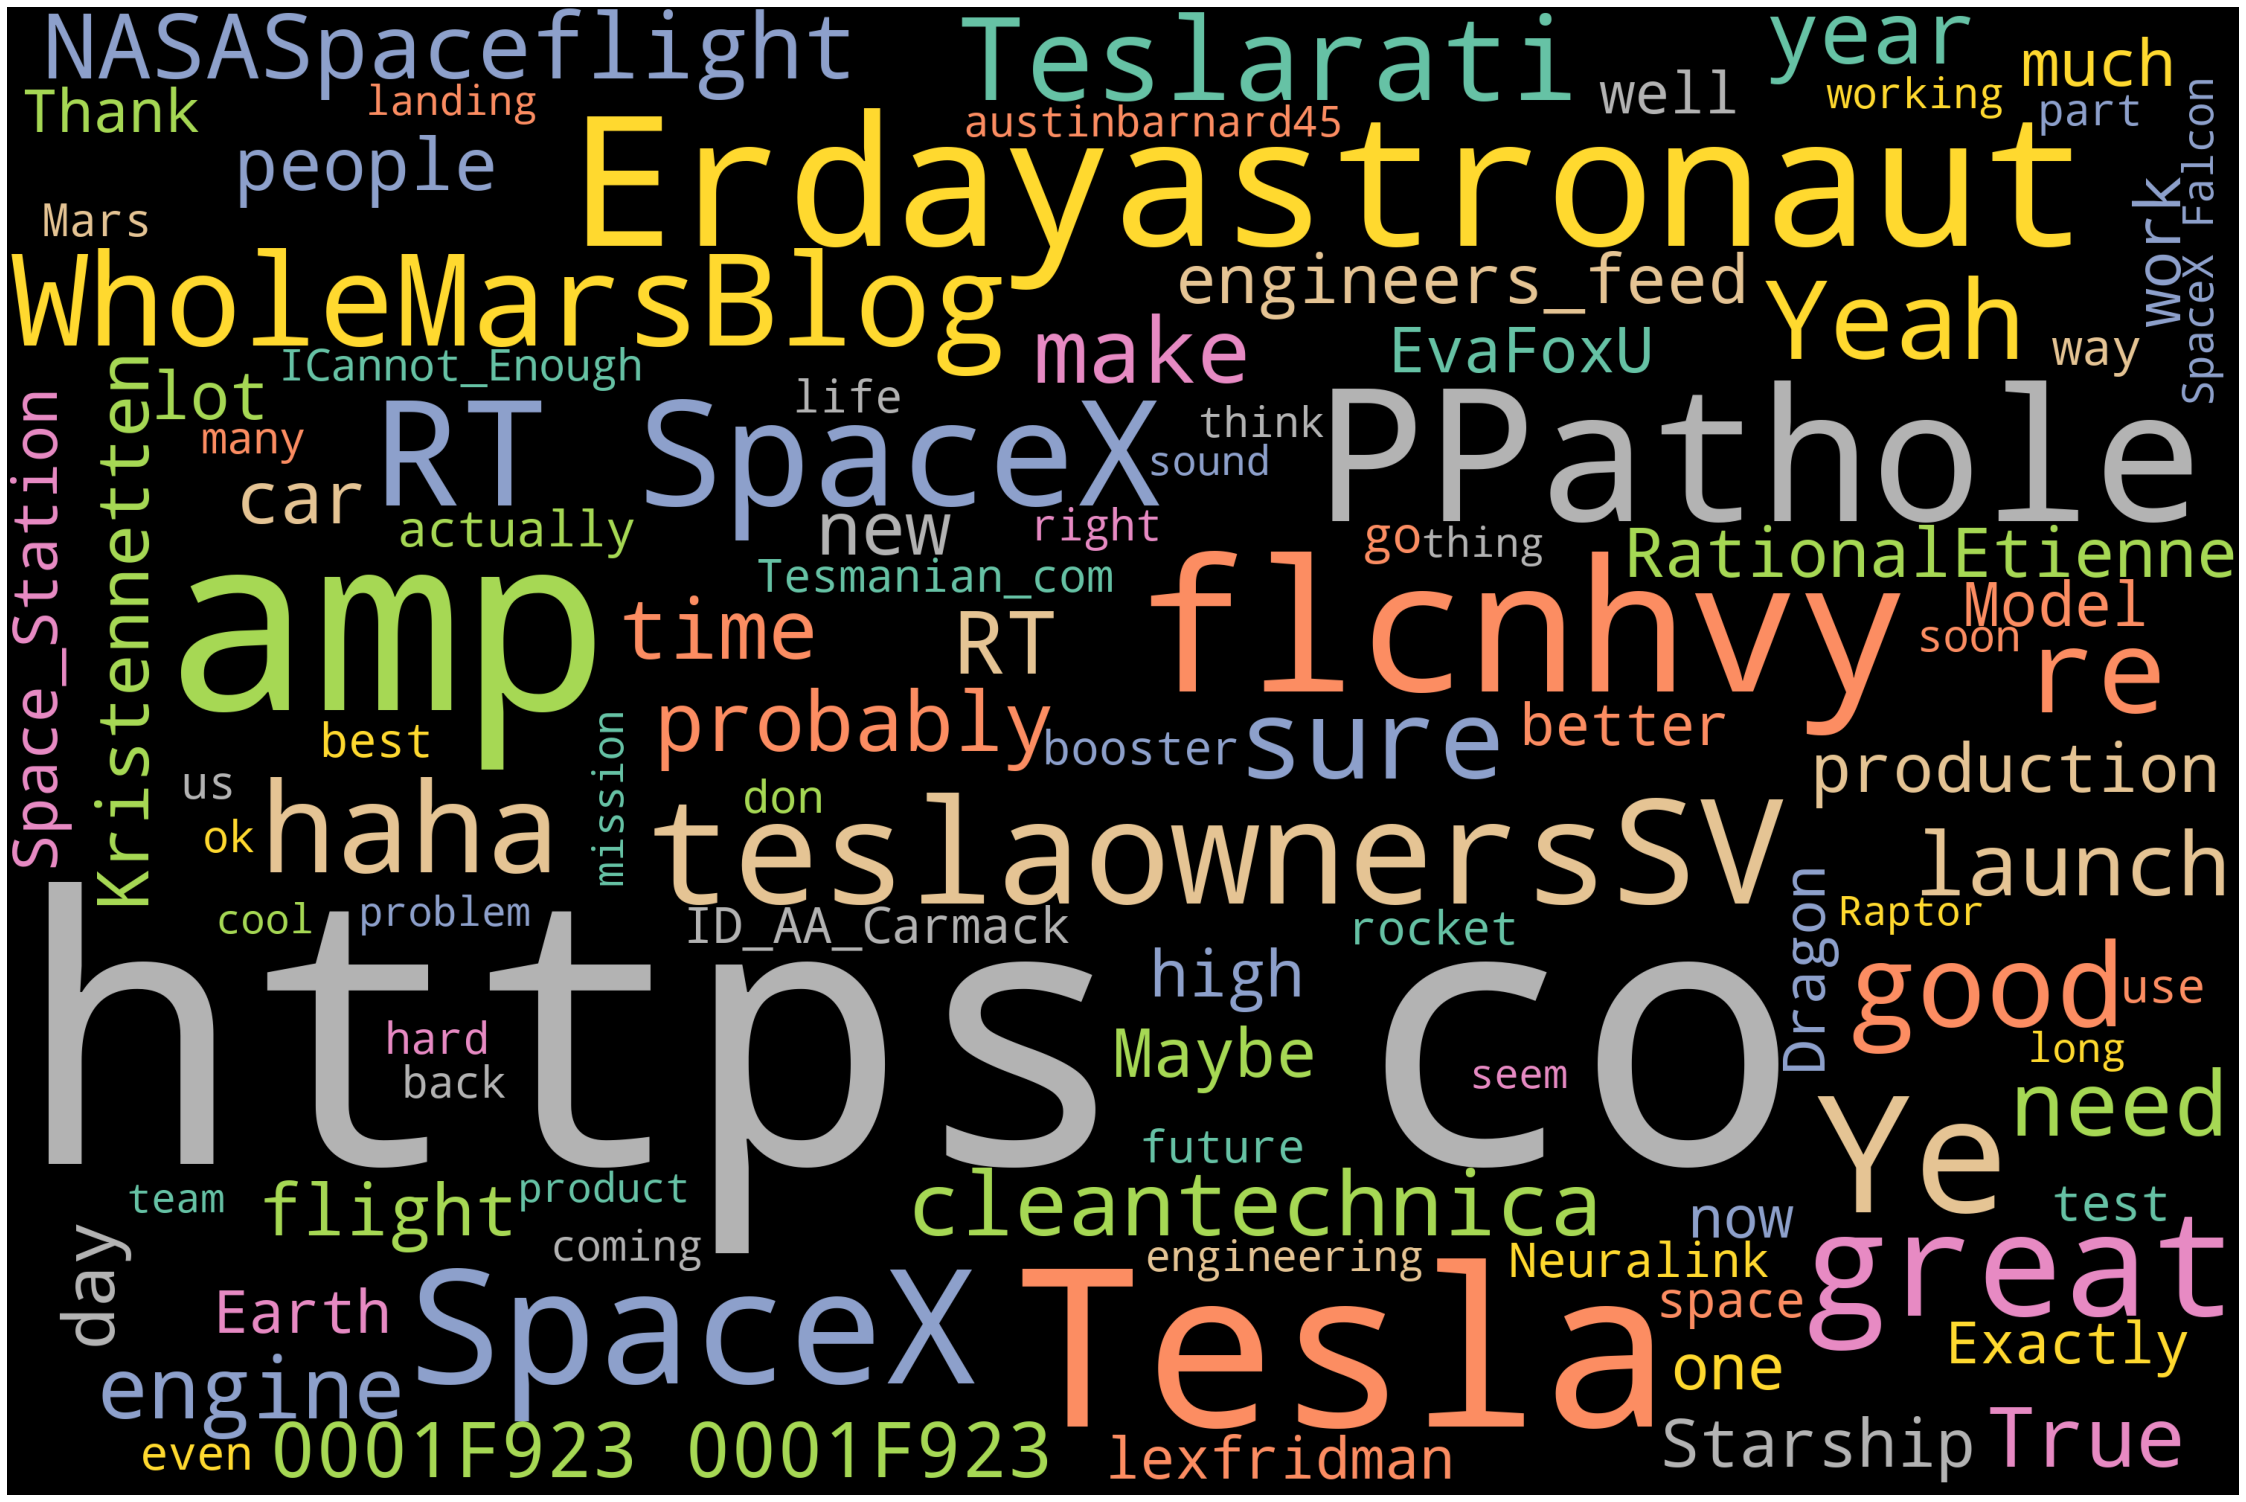

In [74]:
# generate wordcloud 
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000,height = 2000, background_color='black',max_words = 100,colormap='Set2',stopwords=stopwords).generate(text)

# plot 
plot_cloud(wordcloud)

In [83]:
freq = pd.Series(' '.join(Elon_musk).split()).value_counts()[0:100]
freq

the     403
to      390
is      347
a       324
of      301
       ... 
too      25
your     25
few      24
You      24
Yes,     24
Length: 100, dtype: int64

In [84]:
import collections
from collections import Counter
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [93]:
from nltk import tokenize 
sentences = tokenize.sent_tokenize(' '.join(Elon_musk))
sentences[5:15]

['Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It’s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U+0001F923> This is true power haha https://t.co/Fc9uhQSd7O @freewalletorg Any crypto wallet that won’t give you your private keys should be avoided at all costs @freewalletorg Your app sucks RT @SpaceX: NASA has selected Falcon Heavy to launch the first two elements o

In [94]:
# create dataframe 
sent_df = pd.DataFrame(sentences,columns=['sentences'])
sent_df

,sentences
0,@kunalb11 I’m an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
909,"@kenyanwalstreet Not actually a payout, just a..."
910,"It may never pay out, as the stock can’t b… ht..."
911,Details Aug 28.
912,AI symbiosis while u wait @vistacruiser7 @flcn...


In [95]:
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [113]:
# custom function : score each word in a sentence in lemmatised foem 
# but calculated the score for the whole original sentences 

nlp =  spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text:str = None):
  sent_score = 0
  if text:
    sentence = nlp(text)
    for word in sentence:
      sent_score += sentiment_lexicon.get(word.lemma_,0)
  return sent_score    

In [119]:
# test that it works 
calculate_sentiment(text = 'amazing')

4

In [120]:
sent_df['sentiment_value'] = sent_df['sentences'].apply(calculate_sentiment)

In [122]:
# how many words are in the sentences 
sent_df['word_count'] = sent_df['sentences'].str.split().apply(len)
sent_df['word_count'].head(10)

0     13
1      4
2      4
3     13
4      8
5      6
6     14
7     10
8      8
9    109
Name: word_count, dtype: int64

In [123]:
sent_df

,sentences,sentiment_value,word_count
0,@kunalb11 I’m an alien @ID_AA_Carmack Ray trac...,0,13
1,Have you tried it?,0,4
2,@joerogan @Spotify Great interview!,3,4
3,@gtera27 Doge is underestimated @teslacn Congr...,3,13
4,Now on to the next for even more!!,0,8
...,...,...,...
909,"@kenyanwalstreet Not actually a payout, just a...",0,11
910,"It may never pay out, as the stock can’t b… ht...",-4,31
911,Details Aug 28.,0,3
912,AI symbiosis while u wait @vistacruiser7 @flcn...,-2,47


In [124]:
sent_df.sort_values(by='sentiment_value').tail(10)

,sentences,sentiment_value,word_count
808,Might be able to… https://t.co/FB7e5nOq2E @Pri...,11,72
644,"It’s not useful for predicting the future, nor...",12,118
182,"Also, w… https://t.co/IYdKttVsqk @cleantechnic...",12,99
42,"@thejackbeyer @NASASpaceflight Cryoproof, then...",12,85
638,It’s… https://t.co/IxhyT6NuiC @Teslarati Tesla...,13,65
80,@teslaownersSV This is a good one @MrBeastYT I...,13,38
578,The “open” areas… https://t.co/rabjKrtQlw @Sav...,14,138
36,"@ajtourville @Erdayastronaut @SpaceX Yes, but ...",15,231
104,@Erdayastronaut @SpaceX Was also thinking that...,16,94
710,We just haven’t observed the… https://t.co/mez...,16,72


In [125]:
# sentiment score of the whole review 
sent_df['sentiment_value'].describe()

count    914.000000
mean       1.505470
std        2.786384
min       -8.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       16.000000
Name: sentiment_value, dtype: float64

In [128]:
# sentiment score of the whole review 
sent_df[sent_df['sentiment_value']<=0].head()


,sentences,sentiment_value,word_count
0,@kunalb11 I’m an alien @ID_AA_Carmack Ray trac...,0,13
1,Have you tried it?,0,4
4,Now on to the next for even more!!,0,8
5,Happy New Year of the Ox!,0,6
6,https://t.co/9WFKMYu2oj Frodo was the underdog...,-2,14


In [130]:
sent_df[sent_df['sentiment_value']>=15].head()

,sentences,sentiment_value,word_count
36,"@ajtourville @Erdayastronaut @SpaceX Yes, but ...",15,231
104,@Erdayastronaut @SpaceX Was also thinking that...,16,94
710,We just haven’t observed the… https://t.co/mez...,16,72


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


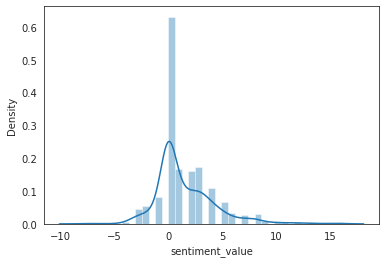

In [132]:
# visualization
import seaborn as sns 
import matplotlib.pyplot as plt
sns.distplot(sent_df['sentiment_value'])

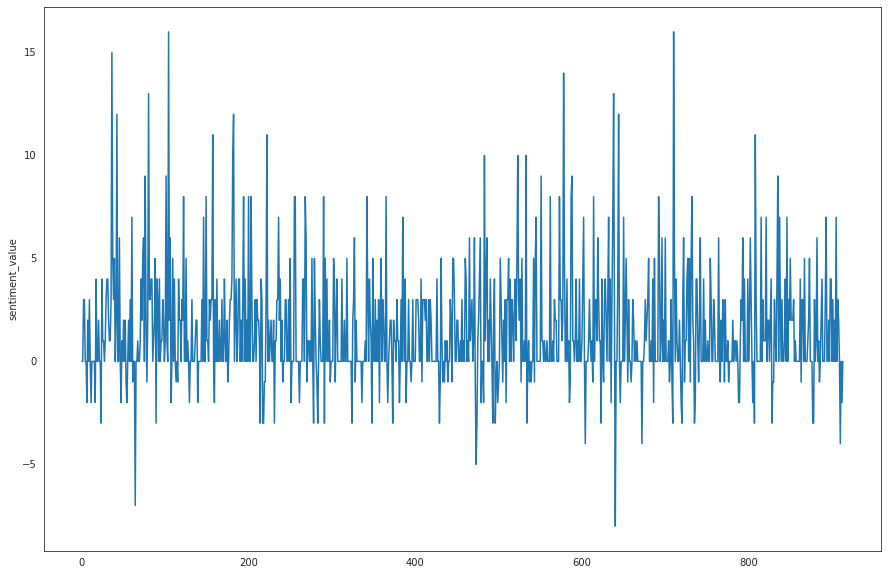

In [134]:
plt.figure(figsize=(15,10))
sns.lineplot(y = 'sentiment_value',x = sent_df.index ,data = sent_df)

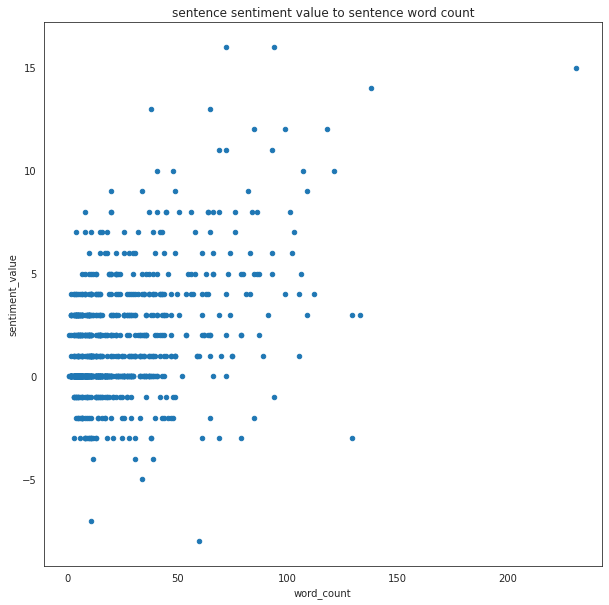

In [135]:
# scatterplot 
sent_df.plot.scatter(x = 'word_count',y = 'sentiment_value',figsize=(10,10),title ='sentence sentiment value to sentence word count')